#### Previo


# Instalación de librerías

In [10]:
import subprocess
import sys

# Lista de paquetes necesarios
paquetes = [
    'numpy', 
    'matplotlib', 
    'pandas', 
    'scipy', 
    'uncertainties',
    'pygame',
]

# Función para instalar paquetes condicionalmente
def instalar_paquete(paquete):
    try:
        __import__(paquete)
        print(f"✅ El paquete '{paquete}' ya está instalado.")
    except ImportError:
        print(f"⚠️ El paquete '{paquete}' no está instalado. Instalando...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", paquete])
        print(f"✅ Paquete '{paquete}' instalado con éxito.")

# Instalar cada paquete de la lista
for paquete in paquetes:
    instalar_paquete(paquete)



✅ El paquete 'numpy' ya está instalado.
✅ El paquete 'matplotlib' ya está instalado.
✅ El paquete 'pandas' ya está instalado.
✅ El paquete 'scipy' ya está instalado.
✅ El paquete 'uncertainties' ya está instalado.
✅ El paquete 'pygame' ya está instalado.


In [10]:
# Previo toca importar paquetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.interpolate import BSpline as Bspline
from scipy.interpolate import splrep
from scipy.optimize import root_scalar
import uncertainties as unc
import uncertainties.unumpy as unp
from uncertainties import ufloat


def plot_template(title, x_label, y_label, x_lim=None, y_lim=None):
    """Genera la plantilla para mantener consistencia en el formato
    de cada tabla generada.

    Args:
        title (string): Aplica titulos.
        x_label (float): Título de eje x.
        y_label (float): Título de eje y.
        x_lim ([float], optional): Límite en eje x. Defaults to None.
        y_lim ([float], optional): Límite en eje y. Defaults to None.

    Returns:
        object: Devuelve los objetos de la gráfica modificados con la
        plantilla requerida
    """
    fig, ax = plt.subplots(  # Tamaño de la figura en pulgadas (ancho, alto)
        figsize=(10, 6)
    )

    # Configuración de rótulos y unidades
    ax.set_title(title, fontsize=18)  # Título con tamaño de fuente
    ax.set_xlabel(x_label, fontsize=16)  # Eje x con rótulo y unidades
    ax.set_ylabel(y_label, fontsize=16)  # Eje y con rótulo y unidades

    # Configuración de la escala y las dimensiones
    if x_lim is not None:
        ax.set_xlim(x_lim)  # Limitar el eje x
    if y_lim is not None:
        ax.set_ylim(y_lim)  # Limitar el eje y

    ax.grid(True, which="both", linestyle="--", alpha=0.7)  # Añadir una cuadrícula

    fig.tight_layout()  # Ajusta los elementos para que no se solapen

    return (  # Devolver las figuras y ejes para más modificaciones si es necesario
        fig,
        ax,
    )


# test
if False:
    x = np.linspace(0, 10, 100)
    fig, ax = plot_template("This is a test", "X label", "Y label", [0, 10], [-1, 1])
    ax.scatter(x, [np.sin(i) for i in x], marker="+", color="red")

# Práctica #2: Formación de Imagenes

_Andrés Felipe Pinzón y Cristian Camilo Pérez_

Universidad Nacional de Colombia

Departamento de Física y Matemáticas


## Tabla de Contenidos

- [Introducción](#introduccion)
- [Modelación Teórica](#modelacion_teorica)
- [Metodología](#metodologia)
- [Análisis y Resultados](#analisis_y_resultados)
- [Conclusiones](#conclusiones)
- [Referencias](#referencias)


## Introducción

En esta práctica experimental, se explorará el comportamiento de las lentes negativas y del comportamiento de la lente positiva como una lupa. A diferencia de las lentes positivas, que convergen los rayos de luz para formar imágenes reales, las lentes negativas divergen los rayos de luz, lo que resulta en la formación de imágenes virtuales. Este comportamiento de las lentes negativas resulta en una dificultad para determinar la distancia focal de una lente negativa, pues no es posible medir la ubicación de esta imagen virtual unicamente con una lente negativa. 

Dicho lo anterior en este laboratorio se construye un montaje que permite medir la distancia focal de una lente negativa utilizando una lente positiva auxiliar, como también encontrar el foco de un sistema de una lente positiva cuando se forma una imagen virtual usando nuevamente una lente positiva auxiliar. Por ultimo se analiza el aumento producido por una lente positiva cuando se usa como lupa.


Para esto usaremos ecuaciones de la óptica geométrica como:

**Ley de Gauss:**

$$
\frac{1}{f} = \frac{1}{s_i} - \frac{1}{s_o}
$$

<!-- Además, al combinar una lente negativa con una positiva, es posible determinar la distancia focal de la lente negativa empleando una lente positiva de distancia focal conocida. El sistema de dos lentes permite la formación de imágenes intermedias que sirven como objetos para la segunda lente, facilitando así el análisis y la medición precisa de las distancias focales involucradas. -->

**Ecuación de aumento transversal:**

$$
m_t = \frac{h_i}{h_o} = \frac{s_i}{s_o}
$$



## Modelación teórica
Para determinar la distancia focal $f_-$ de una lente negativa empleando una lente positiva auxiliar de distancia focal conocida $f_+$, se considera un sistema de dos lentes separadas por una distancia $d$.


### Sistema de Dos Lentes

Haciendo uso de la representación con Geogebra de un sistema de dos lentes (negativa-positiva), realizada por David Matellano:

In [13]:
from IPython.display import IFrame

# URL del recurso de GeoGebra
geogebra_url = "https://www.geogebra.org/classic/m7gnccjz"

# Incrustar el applet en el cuaderno
IFrame(src=geogebra_url, width=1000, height=700)


1. **Primera Lente (Negativa):**
   $$
   \frac{1}{f_-} = \frac{1}{s_{i_-}} - \frac{1}{s_o}
   $$
   Donde:
   - $s_o$: Distancia del objeto a la lente negativa.
   - $s_{i_-}$: Distancia de la imagen formada por la lente negativa.

2. **Segunda Lente (Positiva):**
   $$
   \frac{1}{f_+} = \frac{1}{s_{i_+}} - \frac{1}{s_{o_+}}
   $$
   Donde:
   - $s_{o_+} = -d + s_{i_-}$: Distancia del objeto para la lente positiva (imagen de la lente negativa).
   - $s_{i_+}$: Distancia de la imagen final del sistema.

### Relación entre las Distancias

Despejando $s_{i_-} = d + s_{o_+}$ y sustituyendo $s_{i_-}$ en la ecuación de la primera lente:
$$
\frac{1}{f_-} = \frac{1}{d + s_{o_+}} - \frac{1}{s_o}
$$

Despejando $s_{o_+}$ de la segunda ecuación:
$$
s_{o_+} = \frac{f_+ s_{i_{+}}}{-s_{i_+} + f_+}
$$

Sustituyendo $s_{i_-}$ en la ecuación de la primera lente:
$$
\frac{1}{f_-} = \frac{1}{d + \left(\frac{f_+ s_{i_{+}}}{-s_{i_+} + f_+}\right)} - \frac{1}{s_o}
$$


### Linealización para Regresión

Reorganizando las ecuaciones para obtener una relación lineal entre $\frac{1}{s_{i_+}}$ y $\frac{1}{s_o}$:


$$
\begin{align}
\frac{1}{s_{o}} &= \frac{1}{d +\left(\frac{f_+ s_{i_{+}}}{-s_{i_+} + f_+}\right)} - \frac{1}{f_-} \\
&= \frac{-s_{i_+}+f_+}{d (f_+-s_{i_+})+f s_{i_+}}-\frac{1}{{f_-}}
\end{align}
$$

Luego se obtiene la relación lineal:

$$
y = \frac{1}{s_{o}} \quad \text{vs.} \quad x = \frac{f_+ - s_{i_+}}{d (f_+-s_{i_+})+f s_{i_+}}
$$

entonces:

$$
m = 1  \quad \text{y} \quad b = -\frac{1}{f_-}
$$


Esta relación permite realizar una regresión lineal con los datos experimentales de $s_o$ y $s_{i_+}$ para determinar $f_-$. Si además se cambia $f_-$ por $f_+'$,donde $f_+'$ es la distancia focal de la lente positiva que genera la imagen virtual, se puede determinar la distancia focal de la lente positiva $f_+'$. Como se ve en el siguiente sistema:

In [1]:
from IPython.display import IFrame

# URL del recurso de GeoGebra
geogebra_url = "https://www.geogebra.org/classic/m7gnccjz"

# Incrustar el applet en el cuaderno
IFrame(src=geogebra_url, width=1000, height=700)

### Aumento Transversal ($m_t$) y Aumento Angular ($m_a$)

- **Aumento Transversal:**
  $$
  m_t = \frac{h_i}{h_o} = \frac{s_i}{s_o}
  $$


## Metodología


### Esquema experimental


![Esquema](esquema.png)


### Procedimiento Experimental


## Análisis y Resultados


se tratan los datos para tener unas tablas que brinden información relevante del fenómeno


### Tratamiento de datos


## Tratamiento de Datos

Se describen las variables que se van a tratar. Todos los datos que contengan una incertidumbre, usualmente se notarán con un `u_` al principio.

### Medidas Directas

- `Op`: Posición de la lente positiva auxiliar $l_p = 60.0 \pm 0.2 \, \text{cm}$
- `Op'`: Posición de la lente positiva principal $L_G = 71.0 \pm 0.2 \, \text{cm}$
- `Om`: Posición de la lente negativa $L_N = 102.0 \pm 0.2 \, \text{cm}$
- `p_o`: Posición del objeto en la regla.
- `p_i`: Posición de la imagen en la regla.
- `s_o`: Distancia del objeto a la lente negativa $s_o$
- `s_i`: Distancia de la imagen a la lente positiva $s_i$
- `hi`: Altura de la imagen $h_i$

### Medidas Indirectas

- `f_neg`: Distancia focal de la lente negativa $f_-$ (desconocida)
- `m_t`: Aumento transversal $m_t = \frac{h_i}{h_o}$ (donde $h_o = 5.0 \, \text{mm} \pm 0.1 \, \text{mm}$)
- `m_a`: Aumento angular $m_a = \frac{\theta_i}{\theta_o}$

### Propagación de Incertidumbres

La propagación del error viene dada por la incertidumbre sistemática que se calcula como:

$$
\sigma(g) = \left| \frac{\partial f}{\partial x} \right| \sigma(x) + \left| \frac{\partial f}{\partial z} \right| \sigma(z)
$$

Y la propagación estadística como es usual:

$$
\sigma^2(f) = \left( \frac{\partial f}{\partial x} \right)^2 \sigma^2(x) + \left( \frac{\partial f}{\partial z} \right)^2 \sigma^2(z)
$$

#### Datos


se guardan los datos para el procesamiento.


In [66]:
nominal_s =0.2  # cm

Om = 600 #\pm 2 mm
Op = 710 #\pm 2 mm

# Datos test
# Om = 0 #\pm 2 mm
# Op = 40 #\pm 2 mm
#p_o = np.array([-2, -2.1, -2.2, -2.3, -2.4, -2.5])
#p_i_data = np.array([[6.1429], [6.1384], [6.1342], [6.1303], [6.1266], [6.1231]])

p_o = np.array([29.9, 20.0, 33.0, 36.0, 39.0, 42.0, 45.0])  # cm
p_i_data = [
    [106.8, 107.4, 107.2], 
    [106.1, 105.9, 106.2], 
    [107.5, 107.6, 106.9],
    [108.7, 107.6, 108.1],
    [108.6, 108.4, 109.2, 109.0],
    [109.4, 109.1, 109.6],
    [110.8, 111.0, 110.8],
]  # cm

# Procesamiento de datos: calcular medias e incertidumbres
si_means = []
si_unc = []
for measurements in p_i_data:
    measurements = np.array(measurements)
    # Eliminar outliers (valores > 200 cm)
    if len(measurements) < 2:
            std = 0
    else:
        std = np.std(measurements, ddof=1) / np.sqrt(len(measurements))    # Incertidumbre nominal de ±0.2 cm
    total_unc = np.sqrt(std**2 + nominal_s**2)
    si_means.append(np.mean(measurements))
    si_unc.append(total_unc)

si_means = np.array(si_means)
si_unc = np.array(si_unc)

# Crear DataFrame
df = pd.DataFrame({
    "p_o (cm)": p_o,
    "p_i_mean (cm)": si_means,
    "p_i_unc (cm)": si_unc
})

# Mostrar DataFrame
print(df)

# Uncertainties

# Convertir a unidades de mm

so = p_o * 10
si_means = si_means * 10
si_unc = si_unc * 10

po = unp.uarray(so, nominal_s)
pi = unp.uarray(si_means, si_unc)

so = po - Om
si = pi - Op

# Crear DataFrame

df = pd.DataFrame({
    "s_o (mm)": so,
    "s_i (mm)": si
})

# Mostrar DataFrame

print(df)


   p_o (cm)  p_i_mean (cm)  p_i_unc (cm)
0      29.9     107.133333      0.266667
1      20.0     106.066667      0.218581
2      33.0     107.333333      0.296273
3      36.0     108.133333      0.375648
4      39.0     108.800000      0.270801
5      42.0     109.366667      0.247207
6      45.0     110.866667      0.210819
         s_o (mm)     s_i (mm)
0  -301.00+/-0.20  361.3+/-2.7
1  -400.00+/-0.20  350.7+/-2.2
2  -270.00+/-0.20  363.3+/-3.0
3  -240.00+/-0.20      371+/-4
4  -210.00+/-0.20  378.0+/-2.7
5  -180.00+/-0.20  383.7+/-2.5
6  -150.00+/-0.20  398.7+/-2.1


se deriva la tabla resultante, compuesta de los promedios de las mediciones (usual) y la dispersión alrededor de la media calculada como:

$$
\sigma(\hat{\mu}) = \sigma(\bar{x}) = \frac{\hat{\sigma}}{\sqrt{n}}
$$


#### Visualización de Datos ($y = 1/so$ vs $x= \frac{-f_+ + s_{i_+}}{d (f_+-s_{i_+})+f s_{i_+}}$)


se genera una relación de dispersión respecto los datos tomados conociendo que $s_o < 0$, se generaron 2 aproximaciones de ajuste para compararlas:


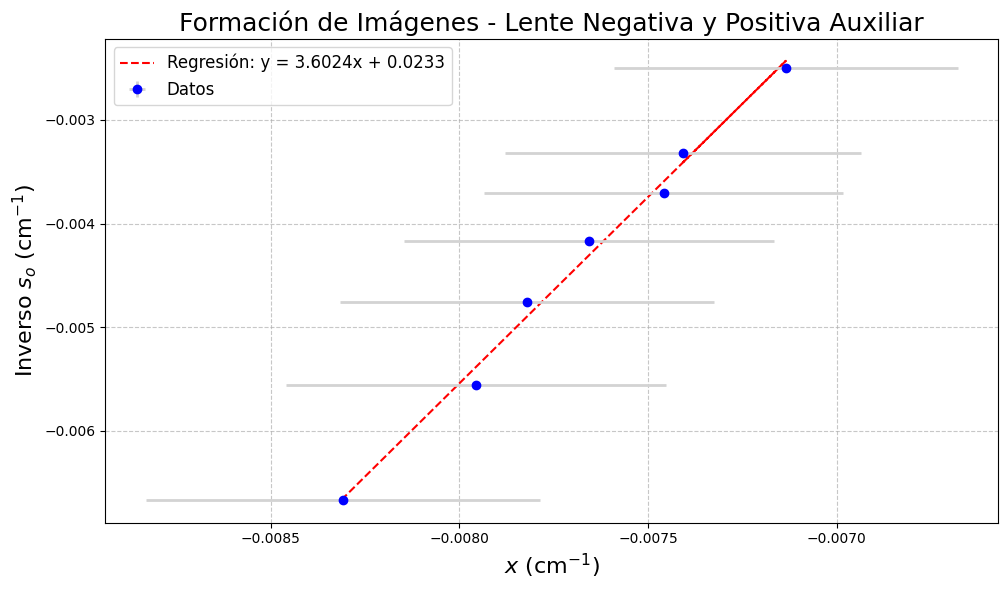

Pendiente (m): 3.6024 cm^-1
Intercepto (b): 0.0233 cm^-1
Coeficiente de determinación (R²): 0.9923
Distancia focal de la lente negativa f_- = -42.96 ± 262.60 cm


In [67]:
#test d = ufloat(40,0) #ufloat(15,0)
#Separación entre lentes

d= ufloat(110.0, 1)  # mm

#distancia focal de la lente positiva auxiliar

f_plus = ufloat(146, 3)  # cmm

# Transformaciones
x = (f_plus - si) / (d * (f_plus - si) + f_plus * si)
y = 1 / so
x_nom = unp.nominal_values(x)
y_nom = unp.nominal_values(y)
x_unc = unp.std_devs(x)
y_unc = unp.std_devs(y)

# Plotting
fig, ax = plot_template(
    title="Formación de Imágenes - Lente Negativa y Positiva Auxiliar",
    x_label=r"$x$ (cm$^{-1}$)",
    y_label=r"Inverso $s_o$ (cm$^{-1}$)",
)

# # Añadir ejes
# ax.axhline(y=0, color="black", linestyle="-", linewidth=0.8)
# ax.axvline(x=0, color="black", linestyle="-", linewidth=0.8)

# Ajuste lineal
r = stats.linregress(x_nom, y_nom)

slope, intercept, r_value, p_value, std_err = r

# Graficar línea de regresión
ax.plot(x_nom, slope*x_nom + intercept, 'r--', label=f"Regresión: y = {slope:.4f}x + {intercept:.4f}")

# Graficar puntos con incertidumbre
ax.errorbar(x_nom, y_nom, xerr=x_unc, yerr=y_unc, fmt='o', color='blue', ecolor='lightgray', elinewidth=2, capsize=0, label="Datos")

# Añadir leyenda
ax.legend(fontsize=12)

plt.show()

# Cálculo de la distancia focal de la lente negativa
d_nom = unp.nominal_values(d)  # cm, separación entre lentes
f_plus_nom = unp.nominal_values(f_plus)  # cm, distancia focal conocida de la lente positiva auxiliar

# Relación lineal:
# y = (1/f_plus) * x + (1/(d - f_minus))
# Despejar f_minus:
# intercept = 1/(d - f_minus) => d - f_minus = 1/intercept => f_minus = d - 1/intercept

f_minus = -(1 / intercept)
# Propagación de incertidumbre para f_minus
# δf_minus = δintercept / intercept^2
delta_f_minus = std_err / intercept**2

print(f"Pendiente (m): {slope:.4f} cm^-1")
print(f"Intercepto (b): {intercept:.4f} cm^-1")
print(f"Coeficiente de determinación (R²): {r_value**2:.4f}")
print(f"Distancia focal de la lente negativa f_- = {f_minus:.2f} ± {delta_f_minus:.2f} cm")

En la _recta verde_ se observa el ajuste de curva asumiendo la pendiente $a = 1$ fijada, de ahí extraeremos si el foco primario resultante $f'$ (`f_m`) a través de asumir esta condición tiene un mejor comportamiento, se obtuvo el intercepto $\frac 1f = b_m = 0.0068(3) \, [\text{mm}^{-1}]$. Con este metodo se obtiene la siguiente relación:

$$
\begin{align*}\frac{1}{s_i} &= \frac{1}{s_o} + \frac 1{f_m}\\
 &= \frac{1}{s_o} + b_m\\
 &= \frac{1}{s_o} + 0.0068(3) \, [\text{mm}^{-1}]\end{align*}
$$

La cual tiene la misma forma que la ecuación de Gauss con posiciónes relativas a la lente.

En la _recta roja_, se genera la regresión con dos grados de libertad, obteniendo valores correspondientes al foco primario $f$ con la pendiente $a = 0.91(1)$ y el intercepto $b_m = 0.0065(5) \, [\text{mm}^{-1}]$ con mayor dispersión. Con este metodo se obtiene la siguiente relación:

$$
\begin{align*}
\frac{1}{s_i} &=  a \frac{1}{s_o} + \frac 1{f}\\
 &= 0.91(1) \frac{1}{s_o} + 0.0065(5) \, [\text{mm}^{-1}]\\
\end{align*}
$$

En el cálculo del foco, se obtiene a partir de los inversos de los interceptos como dicta la ecuación de _Gauss_, de aquí podemos asegurar que el foco principal calculado según estas 2 propuestas son:

$$ f= (153.0 \pm 1.1)\, [\text{mm}] \qquad f_m= (146.3 \pm 0.6)\, [\text{mm}] $$

También es de notar como la gráfica de dispersión permite dilucidar alguna forma de curva pues en la mitad de la regresión los datos están por debajo de esta y en los otros casos, por encima. Puede ser este un efecto de la aproximación paraxial que ha de tenerse en cuenta para mediciones más precisas, puesto que ya con este efecto _se pierde el solape de la incertidumbre con el ajuste_.


# Conclusiones


## Acerca de las preguntas


### 1. Para las 10 medidas, ¿en qué posición de la pantalla-imagen se tiene mayor incertidumbre?

Comparando las incertidumbres abolutas después del proceso de propagación, obtenemos la descripción de una variación de 2.0 mm a 3.0 mm, sin una aparente relación a lo largo de la distancia $s_i$ donde se enfoca (vease fig. inferior). Al momento de las mediciones, retardabamos más la medida dada la incertidumbre a mayores distancias, pues no se percibia enormemente la nitidez si habián fuentes de luz y principalmente que el ángulo a mayores distancias tenía una variación menorm por lo que la imagen proyectada tenía mayor rango para volverse nítida.

Aparentemente, fueron otras variables de error como la prisa que dieron a las medidas más certeras un mayor grado de incertidumbre y no haber tomado suficientes medidas en lo lejano, pero ya no era perceptible, dadas las condiciones, de hacer una medida apropiada, por lo que el sesgo pueda darse en ese sentido.


Izquierda = 2.3947108464224223 derecha = 2.8304272404018485


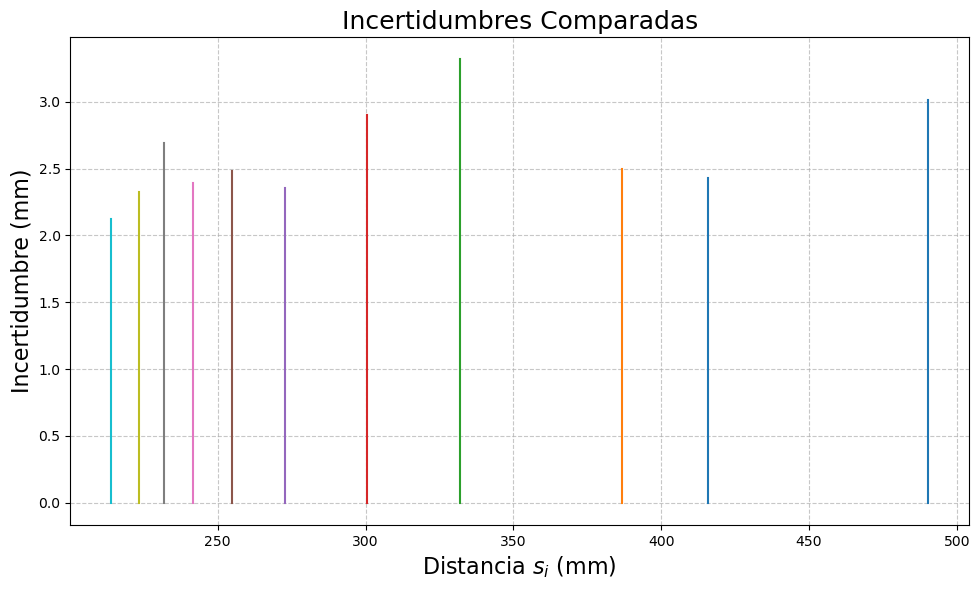

In [100]:
fig, ax = plot_template(
    title="Incertidumbres Comparadas",
    x_label="Distancia $s_i$ (mm)",
    y_label="Incertidumbre (mm)",
)
x = df["Promedio si (mm)"]
y = df["Incertidumbre si (mm)"]
# ax.plot(x, y, "+")
for i in range(len(x)):
    ax.plot([x[i], x[i]], [0, y[i]], "-")

x_izquierda = np.mean(y[5:])
x_derecha = np.mean(y[:5])
print(f"Izquierda = {x_izquierda} derecha = {x_derecha}")

plt.show()

### 2. Realice una gráfica $s_i$ vs $s_o$ y dibuje la curva de ajuste. señale el punto donde la imagen tiene el mismo tamaño que el objeto.


#### Buscar el punto de igual tamaño


In [ ]:
def encontrar_igual_distancia(func):
    """
    Encuentra el valor de s_o tal que so = func(so).

    Args:
        func: La función a resolver (ajuste, ajuste_m o ajuste_mf).
        f: El valor constante de f.
        slope: El valor constante de slope (si aplica, puede ser None).
        f_m: El valor constante de f_m (si aplica, puede ser None).
        guess: Valor inicial para la solución (default 1.0).

    Returns:
        float: El valor de so donde so = func(so).
    """

    # Define la función para la raíz
    def root_func(var_so):
        return var_so + func(var_so)

    # Encuentra la raíz
    solution = root_scalar(root_func, bracket=[-450, -200], method="bisect")

    if solution.converged:
        return solution.root
    else:
        raise ValueError("No se pudo encontrar una solución.")

se definen y se grafican las funciones $s_i = f(s_o)$ para el caso regresión lineal realizado con la pendiente fija $a = 1$ y la regresión lineal con 2 grados de libertad. Estas funciones son respectivamente:

$$
\begin{aligned}
s_i &= \frac{ s_o f_m}{s_o + f_m} \\
s_i &=  \frac{s_o f}{s_o + a f}
\end{aligned}
$$


#### Graficar


so_ajuste = -305.9431691571913, imagen = 305.94316915719105
so_ajuste_m = -292.1901329302042 imagen = 292.19013293020305
so_ajuste_mf = -292.54150133439333 imagen = 292.54150133439515
so_ajuste_splines = -294.0881374967209 imagen = 294.0881374967209


Text(-294.0881374967209, 246.0881374967209, '($s_o$= -294.1, $s_i$= 294.1)')

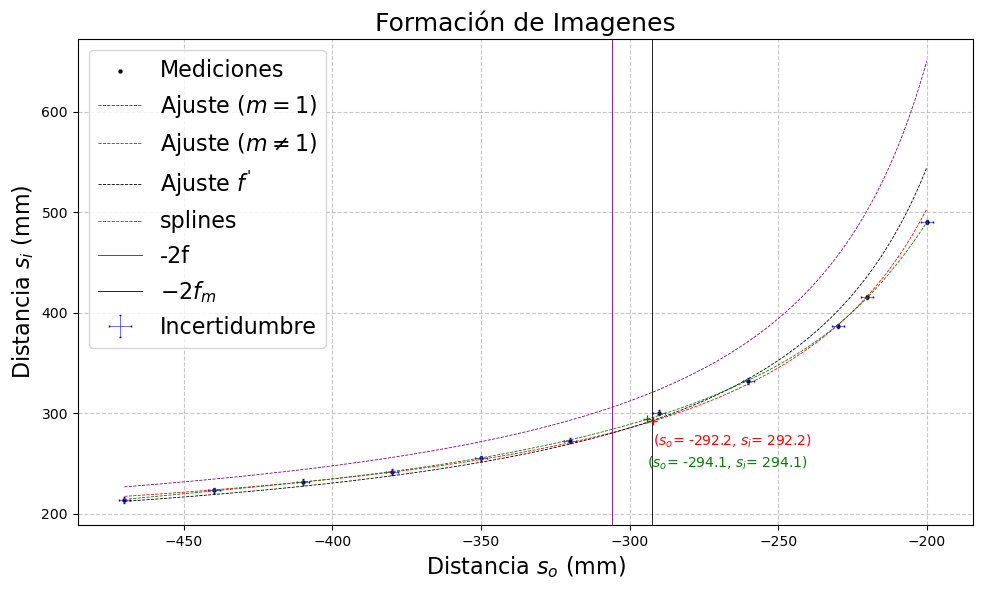

In [102]:
# inversos
y_vals = si_mean
u_y_vals = si_uncertain
x_vals = -so
u_x_vals = nominal_s

# Ensure the input data is sorted
sorted_indices = np.argsort(x_vals)
x_vals = x_vals[sorted_indices]
y_vals = y_vals[sorted_indices]

# Plotting
fig, ax = plot_template(
    title="Formación de Imagenes",
    x_label="Distancia $s_o$ (mm)",
    y_label="Distancia $s_i$ (mm)",
    # x_lim=[0.002, 0.005]
)
# errores
ax.errorbar(
    x_vals,
    y_vals,
    xerr=u_x_vals,
    yerr=u_y_vals,
    linestyle="none",
    color="blue",
    capsize=1,
    capthick=1,
    lw=0.4,
    label="Incertidumbre",
)
# datos
ax.scatter(x_vals, y_vals, marker=".", lw=0.1, color="black", label="Mediciones")


# resultante
def ajuste(var_so):
    return (var_so * f) / (var_so + f)


def ajuste_m(var_so):
    return (var_so * f) / (var_so + slope * f)


# forzada a ser a = 1
def ajuste_mf(var_so):
    return (var_so * f_m) / (var_so + f_m)


# splines

tck_s = splrep(x_vals, y_vals, s=len(x_vals))


# encontrar so = si
so_ajuste = encontrar_igual_distancia(ajuste)
so_ajuste_m = encontrar_igual_distancia(ajuste_m)
so_ajuste_mf = encontrar_igual_distancia(ajuste_mf)
so_ajuste_splines = encontrar_igual_distancia(Bspline(*tck_s))


print(f"so_ajuste = {so_ajuste}, imagen = {ajuste(so_ajuste)}")
print(f"so_ajuste_m = {so_ajuste_m} imagen = {ajuste_m(so_ajuste_m)}")
print(f"so_ajuste_mf = {so_ajuste_mf} imagen = {ajuste_mf(so_ajuste_mf)}")
print(
    f"so_ajuste_splines = {so_ajuste_splines} imagen = {Bspline(*tck_s)(so_ajuste_splines)}"
)


x = np.linspace(min(x_vals), max(x_vals), 400)
ax.plot(x, ajuste(x), label="Ajuste ($m = 1$)", color="purple", ls="--", lw=0.6)
ax.plot(x, ajuste_m(x), label="Ajuste ($m \\ne 1$)", color="red", ls="--", lw=0.6)
ax.plot(x, ajuste_mf(x), label="Ajuste $f^'$", color="black", ls="--", lw=0.6)
ax.plot(x, Bspline(*tck_s)(x), label="splines", color="green", ls="--", lw=0.6)
ax.axvline(-2 * f, label="-2f", lw=0.6, color="purple", ls="-")
ax.axvline(-2 * f_m, label=rf"$-2f_m$", lw=0.6, color="black", ls="-")


ax.legend(fontsize=16)

# ax.plot(so_ajuste, ajuste(so_ajuste), "o", color="purple")
ax.plot(so_ajuste_m, ajuste_m(so_ajuste_m), "+", color="red")
# ax.plot(so_ajuste_mf, ajuste_mf(so_ajuste_mf), "o", color="black")
ax.plot(so_ajuste_splines, Bspline(*tck_s)(so_ajuste_splines), "+", color="green")


## dibujar ubicación so = si

# ax.text(so_ajuste-25, ajuste(so_ajuste)+12, rf"($s_o$= {so_ajuste:.1f}, $s_i$= {ajuste(so_ajuste):.1f})", fontsize=10, color="purple")
ax.text(
    so_ajuste_m,
    ajuste_m(so_ajuste_m) - 24,
    rf"($s_o$= {so_ajuste_m:.1f}, $s_i$= {ajuste_m(so_ajuste_m):.1f})",
    fontsize=10,
    color="red",
)
# ax.text(so_ajuste_mf, ajuste_mf(so_ajuste_mf)-36, rf"($s_o$= {so_ajuste_mf:.1f}, $s_i$= {ajuste_mf(so_ajuste_mf):.1f})", fontsize=10, color="black")
ax.text(
    so_ajuste_splines,
    Bspline(*tck_s)(so_ajuste_splines) - 48,
    rf"($s_o$= {so_ajuste_splines:.1f}, $s_i$= {Bspline(*tck_s)(so_ajuste_splines):.1f})",
    fontsize=10,
    color="green",
)

A traves de los ajustes por spline y mínimos cuadrados, se obtuvo que el $s_o$ donde la imagen tiene el mismo tamaño que la imagen $s_i$ es:

- $s_o = -292.2$ para la regresión lineal, punto rojo.
- $s_o = -294.0$ para el ajuste por spline, punto verde.

se pude notar que ambos puntos obtenidos son muy cercanos, a la linea perpendicular que es $2 f_m$, que a la linea perpendicular que es $2 f$.


### 3. Realice una gráfica $ \frac{1}{s_i} $ vs $ \frac{1}{s_o} $ y dibuje la recta de ajuste. ¿Cuál es el valor de la distancia focal y su error?

Está explicado y deducido en el apartado [Visualización de Datos](####visualizacion_de_datos). También basta comentar que dado que la función requerida es la exhibida por la pendiente $a=0$, ecuación teórica que estamos suponiendo para nuestra práctica experimental, luego tomaremos el resultado segundo $f'$ (`f_m`).


### 4. ¿Cómo puede medir la distancia focal a partir de las posiciones del objeto y la imagen para los aumentos recíprocos ( $m$ y $1 / m$ ).


#### Aumentos Recíprocos


De la ley de Gauss se puede concluir que si:

$$
\begin{aligned}
\frac{1}{f} &= \frac{1}{s_i} - \frac{1}{s_o} \\
\frac{1}{f} &= \frac{1}{s_i'} - \frac{1}{s_o'} \\
\end{aligned}
$$

entonces:

$$
\begin{aligned}
f &= \frac{s_o s_i}{s_o - s_i} \\
f &= \frac{s_o' s_i'}{s_o' - s_i'} \\
\end{aligned}
$$

Ademas también para un aumento $m$, las posiciones son con respecto a la lente $s_o, s_i$, entonces:

$$
m = -\frac{s_i}{s_o}
$$

Y para un aumento $\frac{1}{m}$, son $s_o', s_i'$, entonces:

$$
m = \frac{s_o'}{s_i'}
$$

Como además:

$$
\begin{aligned}
m = \frac{f}{x_o} = -\frac{f}{x_i} \quad y \quad \frac{1}{m} = \frac{f}{x_i'} = -\frac{f}{x_o'}
\end{aligned}
$$

Entonces:

$$
\begin{aligned}
m= \frac{f}{s_o+f} = -\frac{s_i - f}{f} \quad y \quad \frac{1}{m} = \frac{f}{s_o' + f} = -\frac{s_i' - f}{f}
\end{aligned}
$$

De aquí se deduce:

$$
\begin{aligned}
\frac{f}{s_o + f} = \frac{s_o'+ f}{f}
 \quad &\implies \quad f^2 = (s_o + f)(s_o' + f)\\
&\implies \quad \cancel{f^2} = (s_o + f)(s_o' + f) = s_o s_o' + fs_o + fs_i + \cancel{f^2}\\
&\implies \quad f = -\frac{s_o s_o'}{s_o + s_o'}
\end{aligned}
$$

Tambien:

$$
\begin{aligned}
-\frac{f}{s_i - f} = -\frac{s_i' - f}{f} \quad &\implies \quad f^2 = (s_i - f)(s_i' - f)\\
&\implies \quad \cancel{f^2} = (s_i - f)(s_i' - f) = s_i s_i' - fs_i - fs_i + \cancel{f^2}\\
&\implies \quad f = \frac{s_i s_i'}{s_i + s_i'}
\end{aligned}
$$

Por lo que se tienen cuatro ecuaciones para determinar la distancia focal a partir de las posiciones del objeto y la imagen para los aumentos recíprocos:

$$
\begin{aligned}
f &= -\frac{s_o s_o'}{s_o + s_o'}\\
f &= \frac{s_i s_i'}{s_i + s_i'}\\
f &= \frac{s_o s_i}{s_o - s_i}\\
f &= \frac{s_o' s_i'}{s_o' - s_i'}
\end{aligned}
$$


se utiliza `uncertainties` para la propagación de errores.


#### Deducción


In [ ]:
xo = 500
xi = 1200

xo = unc.ufloat(500, nominal_s)
xi = unc.ufloat(1200, nominal_s)

# Métodos de calulo de distancia focal


def metodo1(so, SO):
    return -(so * SO) / (so + SO)


def metodo2(si, SI):
    return (si * SI) / (si + SI)


def metodo3(so, si):
    return (so * si) / (so - si)


def metodo4(SO, SI):
    return (SI * SO) / (SO - SI)


# Magnificacion m
OM = np.array([696, 697, 695, 698])
OM_mean = np.mean(OM)
OM_uncertain = np.std(OM, ddof=1) / np.sqrt(4)


# magnificacion 1/m
Om = np.array([983, 987, 986, 983])
Om_mean = np.mean(Om)
Om_uncertain = np.std(Om, ddof=1) / np.sqrt(4)

# Incertidumbre total
Om_error = np.sqrt(OM_uncertain**2 + nominal_s**2)
OM_error = np.sqrt(Om_uncertain**2 + nominal_s**2)


# OM y Om con error
OM = unc.ufloat(OM_mean, OM_error)
Om = unc.ufloat(Om_mean, Om_error)

# Calculos distancia relativas a la lente

# Posiciones relativas a la lente para la magnificación
SO = xo - OM
SI = xi - OM


def show_results():
    # Posiciones relativas a la lente para la magnificación recíproca
    so = xo - Om
    si = xi - Om

    print(xo, xi)
    print(
        f"""
    Posicion objeto con magnificacion M {SO} mm
    Posicion imagen con magnificacion M {SI} mm
    Posicion objeto con magnificacion 1/M {so} mm
    Posicion imagen con magnificacion 1/M {si} mm
    """
    )

    print(
        f"""  
    Metodo 1: f = {metodo1(so, SO)}
    Metodo 2: f = {metodo2(si, SI)}
    Metodo 3: f = {metodo3(so, si)}
    Metodo 4: f = {metodo4(SO, SI)}
    mean f = {(metodo1(so, SO) + metodo2(si, SI) + metodo3(so, si) + metodo4(SO, SI))/4}
    """
    )


show_results()

500.0+/-2.0 1200.0+/-2.0

    Posicion objeto con magnificacion M -196.5+/-3.0 mm
    Posicion imagen con magnificacion M 503.5+/-3.0 mm
    Posicion objeto con magnificacion 1/M -484.8+/-2.9 mm
    Posicion imagen con magnificacion 1/M 215.2+/-2.9 mm
    
  
    Metodo 1: f = 139.8+/-1.6
    Metodo 2: f = 150.8+/-1.6
    Metodo 3: f = 149.1+/-1.3
    Metodo 4: f = 141.3+/-1.4
    mean f = 145.3+/-1.0
    


#### Conclusión


Para cada método usando las posiciones de los aumentos recíprocos, se obtiene:

- $f = 140(2) \, \text{mm}$ para $f = -\frac{s_o s_o'}{s_o + s_o'}$
- $f = 151(2) \, \text{mm}$ para $f = \frac{s_i s_i'}{s_i + s_i'}$
- $f = 149(1) \, \text{mm}$ para $f = \frac{s_o s_i}{s_o - s_i}$
- $f = 141(1) \, \text{mm}$ para $f = \frac{s_o' s_i'}{s_o' - s_i'}$

Por lo que se puede concluir que la distancia focal focal promedio de los 4 métodos es $f = 145(2) \, \text{mm}$.


### 5. Realice una gráfica $s_o$ vs $m$ o $1 / m$ y dibuje curva/recta de ajuste. ¿Cuál es el valor de la distancia focal y su error?


Dado que:

$$
\begin{aligned}
m = \frac{f}{x_o} &= \frac{f}{s_o + f} \\
\end{aligned}
$$

Entonces:

$$
\begin{aligned}
s_o + f &= f \frac{1}{m}  \quad &\implies \quad s_o = f \left( \frac{1}{m} \right) - f
\end{aligned}
$$


#### Calulo de aumentos


In [ ]:
hi = unp.uarray(hi_mean, hi_uncertain)
ho = unc.ufloat(17, 0.5)

# Calculo de la inversa de la magnificación

m_reciproco = ho / hi


Pendiente 142.12 ± 2.11
intercepto 142.50 ± 2.87
Correlación 0.998



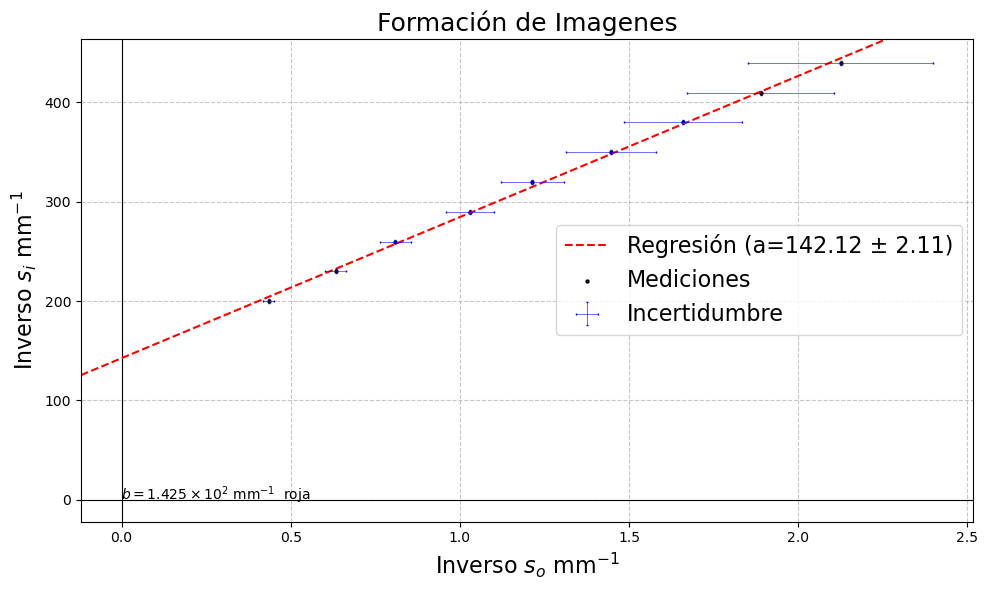

In [133]:
# inversos
y_vals = so[:-2]
u_y_vals = [2] * len(so[:-2])
x_vals = unp.nominal_values(m_reciproco[:-2])
u_x_vals = unp.std_devs(m_reciproco[:-2])

# Plottting
fig, ax = plot_template(
    title="Formación de Imagenes",
    x_label=rf"Inverso $s_o$ mm$^{{-1}}$",
    y_label=rf"Inverso $s_i$ mm$^{{-1}}$",
    # x_lim=[0.002, 0.005]
)
# Graficar ejes
ax.axhline(y=0, color="black", linestyle="-", linewidth=0.8)
ax.axvline(x=0, color="black", linestyle="-", linewidth=0.8)

# Regresión típica
# Calculo
r = stats.linregress(x_vals, y_vals)
slope, intercept, slope_err, u_intercept = (
    r.slope,
    r.intercept,
    r.stderr,
    r.intercept_stderr,
)

# Recta
plt.axline(
    # xy1=(
    #     x_vals[0],
    #     x_vals[0] * slope + intercept,
    # ),  # para que no toque regular los límites
    xy1=(0, intercept),  # para que no toque regular los límites
    slope=slope,
    color="r",
    linestyle="--",
    label=f"Regresión (a={slope:.2f} ± {slope_err:.2f})",
)

# Incertidumbres
ax.errorbar(
    x_vals,
    y_vals,
    xerr=u_x_vals,
    yerr=u_y_vals,
    linestyle="none",
    color="blue",
    capsize=1,
    capthick=1,
    lw=0.4,
    label="Incertidumbre",
)
# Datos puntuales
ax.scatter(x_vals, y_vals, marker=".", lw=0.1, color="black", label="Mediciones")

# Impresion
print(
    f"""
Pendiente {slope:.2f} ± {slope_err:.2f}
intercepto {intercept:.2f} ± {u_intercept:.2f}
Correlación {r.rvalue**2:.3f}
"""
)


# Calcula el exponente y la mantisa
exponent = int(np.floor(np.log10(abs(intercept))))
mantissa = intercept / (10**exponent)

# Crea el número formateado
formatted_number = f"{mantissa:.3f}×10^{exponent}"

# Agrega el texto con el número formateado
ax.text(
    -0.0013, 0.0051, rf"$b = {mantissa:.3f} \times 10^{{{exponent}}}$ mm$^{{-1}}$  roja"
)


# ultima config
# Añadir líneas en los ejes principales
ax.legend(fontsize=16)
plt.show()

De los siguientes resultados, podemos quedarnos con el intercepto o la pendiente, puesto que refieren al mismo foco. De aquí nuestra forma de discriminar es la que obtiene una menor incertidumbre, luego, se obtuvo que la distancia focal es $f = 142(2) \, \text{mm}$.


## 6. ¿Con cuál de los numerales, 3 y 5 , se obtiene el valor más confiable de la distancia focal?


Los resultados obtenidos a través de estos procesos fueron:

$$
f_1= (146.3 \pm 0.6)\, [\text{mm}] \qquad \text{para \#3}
$$

$$
f_2 = (142 \pm 2) \, [\text{mm}] \qquad \text{para \#5}
$$

De los resultados podemos suponer, discriminando por el resultado de la incertidumbre, que el resultado más confiable fue el del método del apartado \#3, puesto que la toma de datos reduce drásticamente la incertidumbre estadística y los datos en la gráfica de dispersión siguen un comportamiento más correlacionado.

Cabe considerar que los resultados obtenidos en cada procedimiento estan variando generalmente en 1 mm, por lo que se sugiere tener esta como base para la incertidumbre general.


### 7. El valor de la distancia imagen cuando el objeto se coloca a una gran distancia de la lente ¿qué relación tiene con la distancia focal? ¿Es confiable esta medida?


A partir del texto del profesor Yobani, se aclara que:

"La posición $a$ corresponde con el objeto en el infinito ($x_o = -\infty$), por lo que su imagen $a'$ estará en el punto focal secundario ($x_i = f$), y el aumento será $m = 0$."

Notaremos entonces la luz se concentrará en un punto focal secundario, a lo que podremos asegurar es la distancia focal $f$ en general, tomada directamente en la práctica.


#### Datos


In [ ]:
origen, u_origen = np.array([980] * 10), np.array([1] * 10)
si, u_si = np.array(
    [1143, 1148, 1146, 1148, 1144, 1142, 1142, 1145, 1146, 1144]
), np.array([1] * 10)

#### Resultados


In [ ]:
f = si - origen
u_f = u_origen + u_si

f_mean = np.mean(f)
f_uncertain = np.std(f, ddof=1) / np.sqrt(10)  # inc. estadistica
f_error = np.sqrt(f_uncertain**2 + nominal_s**2)  # inc total

print(
    f"""
    Foco f= ({f_mean:.0f} +- {f_error:.0f}) mm
"""
)


    Foco f= (165 +- 2) mm



Se obtiene el resultado
$$ f = (165 \pm 2) \, [\text{mm}]$$
En el que las propagaciones de la incertidumbre provocadas por las mediciones directas son mucho más importantes que considerar y no se pueden reducir con más mediciones.

Además, en la medición directa, la calidad del lente hacia que los rayos se concentraran en un punto con un radio significativo, del cuál se percibía intuitivamente dónde iba caracterizado, pero a sesgo del experimentador y no de la medida. El punto en el infinito también pueda ser significativo, en nuestra práctica lo retiramos en alrededor de $\approx 3$ m de distancia, lo cuál parece todavía no es cercano al "infinito" práctico.

De aquí que podamos dar una reducida confiabilidad en el resultado.


### Conclusiones Finales


De los diferentes métodos probados y explicados en esta práctica experimental, los cuáles a partir de parámetros únicos del lente conducen a la caracterización de lentes, el foco, los resultados se resúmen a continuación:

| Parte | Foco $[\text{mm} ]$ |
| ----- | ------------------- |
| 1     | $146.3 \pm 0.6$     |
| 2     | $145 \pm 2$         |
| 3     | $142 \pm 2$         |
| 4     | $165 \pm 2$         |

A pesar de que este **método gráfico (1)** no logra tener en cuenta exactamente la propagación de la incertidumbre de las mediciones, **se aprecia que fue el método más preciso de todos**, siendo el más separado del esperado el último de todos. Además, en el primer método, se pudo apreciar de mejor manera el comportamiento posible del fenómeno y caracterizar varios ajustes probables que coincidan con los resultados esperados. Aquí se aprecia igualmente que dado que los resultados de cada método varían del milímetro, podemos tener _total certidumbre del foco en 14 cm._


## Referencias

Mejía Barbosa, Y. (2020). Fundamentos de óptica : Curso introductorio. Universidad Nacional de Colombia. Facultad de Ciencias.

[David Manteallano - Sistema de dos lentes positivas](https://www.geogebra.org/m/S23Kf563)